In [ ]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

# WordCloud of Eminem Lyrics

In [2]:
import sys
import lyricsgenius
import os
import pandas as pd
import json 
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mishals/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
#Reading Data
file_path = path.relpath("files/Lyrics_Eminem.json")
d = json.load(open(file_path,'r'))
d.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'iq', 'description_annotation', 'user', 'songs'])

In [113]:
#Filtering Data
songs = d['songs']
df = pd.DataFrame(songs)
#list(df.columns)
df = df[['title','lyrics']]

#pd.set_option('max_colwidth', 150) #Better view for dataframe
em = df[['lyrics']]
em

,lyrics
0,"[Intro]\n""Look, I was gonna go easy on you not to hurt your feelings.""\n""But I'm only going to get this one chance."" (Six minutes— Six minutes—)\n..."
1,"[Intro]\nYou sound like a bitch, bitch\nShut the fuck up\nWhen your fans become your haters\nYou done?\nFuckin' beard's weird\nAlright\nYou yellin..."
2,"[Intro]\nLook, if you had one shot or one opportunity\nTo seize everything you ever wanted in one moment\nWould you capture it, or just let it sli..."
3,"[Intro: Rihanna]\nI'm friends with the monster that's under my bed\nGet along with the voices inside of my head\nYou're tryin' to save me, stop ho..."
4,"[Intro: Joyner Lucas]\nWoah, Joyner, Joyner, yeah, yeah, yeah\n\n[Pre-Chorus: Joyner Lucas]\nYeah, I done did a lot of things in my day, I admit i..."
...,...
501,"[Intro: Eminem & Dina Rae]\nMhmmm *inhales*\nYou high, baby?\nYeah\nYeah?\nTalk to me\nYou want me to tell you something?\nUh-huh\nI know what you..."
502,"[Estribillo: Rihanna]\n\n¿Solo vas a quedarte ahí y verme arder?\nBueno, está bien, porque me gusta como duele\n¿Solo vas a quedarte ahí y me escu..."
503,"[Intro: Eminem]\nTak\nWięc chyba tak to jest, co?\nMyślę, że to oczywiste\nNigdy nie zobaczymy się oko w oko\nAle jest to zabawne\nTak bardzo, jak..."
504,"""Breaking news: Detroit rapper Eminem cancels his sold-out European tour to check himself into rehab after admitting an addiction to sleep medicat..."


In [114]:
#Cleaning Data
em.replace(' ', np.nan, inplace=True)
em.dropna(inplace=True)
em.reset_index(inplace=True, drop=True)
em.drop_duplicates(keep=False, inplace=True)
em['lyrics'] = em['lyrics'].str.replace("[^a-zA-Z# ]", " ")
em

,lyrics
0,Intro Look I was gonna go easy on you not to hurt your feelings But I m only going to get this one chance Six minutes Six minutes So...
1,Intro You sound like a bitch bitch Shut the fuck up When your fans become your haters You done Fuckin beard s weird Alright You yellin at th...
2,Intro Look if you had one shot or one opportunity To seize everything you ever wanted in one moment Would you capture it or just let it slip ...
3,Intro Rihanna I m friends with the monster that s under my bed Get along with the voices inside of my head You re tryin to save me stop holdi...
4,Intro Joyner Lucas Woah Joyner Joyner yeah yeah yeah Pre Chorus Joyner Lucas Yeah I done did a lot of things in my day I admit it I ...
...,...
500,Verse Eminem My name is Eminem Verse Dr Dre No It s not your name your name is Marshall Mathers asshole
501,Intro Eminem Dina Rae Mhmmm inhales You high baby Yeah Yeah Talk to me You want me to tell you something Uh huh I know what you wanna h...
502,Estribillo Rihanna Solo vas a quedarte ah y verme arder Bueno est bien porque me gusta como duele Solo vas a quedarte ah y me escuchar...
503,Intro Eminem Tak Wi c chyba tak to jest co My l e to oczywiste Nigdy nie zobaczymy si oko w oko Ale jest to zabawne Tak bardzo jak ci n...


In [115]:
#Setting and removing the Stopwords
file_path = path.relpath("files/sw.txt")
with open(file_path, 'r') as f:
    y = f.read().split('\n')
    
stop = set(stopwords.words("english"))
stop.update(y)
em['lyrics'] = em['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
em

,lyrics
0,Look I gonna go easy hurt feelings But I going get chance Six minutes Six minutes Something wrong I feel Six minutes Slim Shady Just feeling I Lik...
1,You sound like Shut When fans become haters You done Fuckin beard weird Alright You yellin mic weird beard You want smoke We doin You yellin mic b...
2,Look shot opportunity To seize everything ever wanted moment Would capture slip Yo His palms sweaty knees weak arms heavy There vomit sweater alre...
3,Rihanna I friends monster bed Get along voices inside head You tryin save stop holdin breath And think I crazy yeah think I crazy Eminem I wanted ...
4,Joyner Lucas Woah Joyner Joyner yeah yeah yeah Pre Joyner Lucas I done lot things day I admit I take back I I said I meant All life I want Grammy ...
...,...
500,Eminem My name Eminem Dr Dre No It name name Marshall Mathers asshole
501,Eminem Dina Rae Mhmmm inhales You high Talk You want tell something Uh huh I know wanna hear Refrain Eminem Dina Rae I know want I think I want I ...
502,Estribillo Rihanna Solo vas quedarte ah verme arder Bueno est bien porque gusta como duele Solo vas quedarte ah escucharas llorar Bueno est bien p...
503,Eminem Tak Wi c chyba tak jest co My l e oczywiste Nigdy nie zobaczymy si oko w oko Ale jest zabawne Tak bardzo jak ci nienawidz Potrzebuj ci To j...


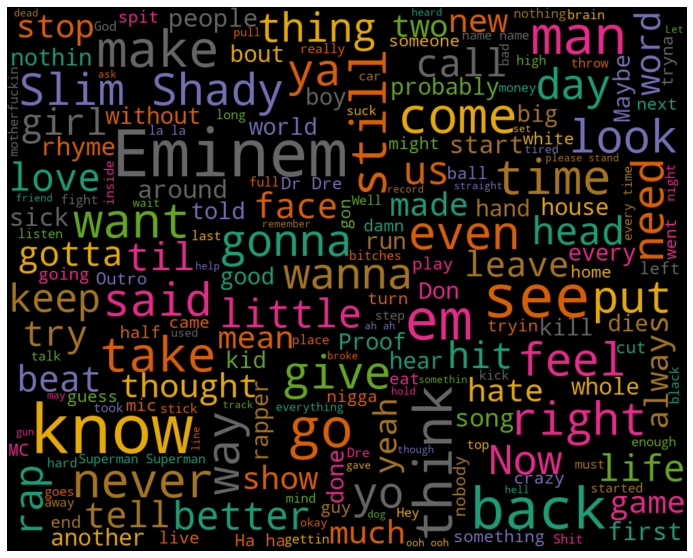

In [116]:
#Generating WordCloud
text = " ".join(twt for twt in em.lyrics)


#len(text)

wc= WordCloud(width=1000, height=800, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(text)

plt.figure(figsize = (14, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word clouds simply make the words that appear the most often the biggest. 

#### As you can see from the word cloud, the words that appear a lot in Eminem's lyrics are basic words because his lyrical vocabulary is amazingly vast and has variation of topics in his songs so the topic words and important words do not appear consistently on his lyrics

#### References

 - Generating Word Cloud in Python by GeeksforGeeks https://www.geeksforgeeks.org/generating-word-cloud-python/